In [1]:
import plotly.express as px
import pandas as pd


In [2]:
df = pd.read_csv('DATA.csv')

In [3]:
df.head()

,mc_run_id,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,...,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants,sex,diet_group,age_group
0,1,fish_female_20-29,5.377071,8.589807,14012.27478,23.553012,1.165277,0.344528,478.802638,669.154382,...,13.788241,0.913103,0.238819,400.289973,402.372408,13.774998,1329,female,fish,20-29
1,1,fish_female_30-39,5.376457,8.620238,15030.26610,23.831419,1.152422,0.326276,469.573862,697.161548,...,13.466037,0.845564,0.210539,375.301226,420.147350,13.077207,2024,female,fish,30-39
2,1,fish_female_40-49,5.169838,8.304831,15441.25934,23.419815,1.095640,0.305898,435.534050,687.733569,...,12.692978,0.773937,0.190561,333.613445,404.151916,12.959012,1689,female,fish,40-49
3,1,fish_female_50-59,4.933744,7.880759,16244.68021,23.459450,0.995247,0.285800,382.097727,686.763592,...,13.825273,0.669932,0.166206,271.061989,429.965087,13.155250,946,female,fish,50-59
4,1,fish_female_60-69,5.428442,8.701867,18364.95302,25.469176,1.127873,0.315651,435.578230,751.050809,...,14.538055,0.907853,0.196968,396.811097,471.376883,14.177048,492,female,fish,60-69


In [4]:
df['diet_group'] = df['diet_group'].map({
    'meat100': 'High Meat Eaters (>100g daily)',
    'meat50': 'Moderate Meat Eaters (50-100g daily)',
    'meat': 'Occasional Meat Eaters (<50g daily)',
    'fish': 'Pescetarians',
    'veggie': 'Vegetarians',
    'vegan': 'Vegans'
})

In [6]:
df.columns

Index(['mc_run_id', 'grouping', 'mean_ghgs', 'mean_land', 'mean_watscar',
       'mean_eut', 'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 'mean_watuse',
       'mean_acid', 'sd_ghgs', 'sd_land', 'sd_watscar', 'sd_eut',
       'sd_ghgs_ch4', 'sd_ghgs_n2o', 'sd_bio', 'sd_watuse', 'sd_acid',
       'n_participants', 'sex', 'diet_group', 'age_group'],
      dtype='object')

In [14]:
# df['sex'] = df['sex'].map({
#     'male': 'Male',
#     'female': 'Female'
# })

In [7]:
grouped_df = df.groupby(['diet_group', 'age_group'])['mean_ghgs'].mean().reset_index()
grouped_df['mean_ghgs'] = grouped_df['mean_ghgs'].round(2)
max_ghgs = grouped_df['mean_ghgs'].max()

In [8]:
grouped_df.head()

,diet_group,age_group,mean_ghgs
0,High Meat Eaters (>100g daily),20-29,14.06
1,High Meat Eaters (>100g daily),30-39,12.94
2,High Meat Eaters (>100g daily),40-49,13.19
3,High Meat Eaters (>100g daily),50-59,13.42
4,High Meat Eaters (>100g daily),60-69,13.34


In [10]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   diet_group  36 non-null     object 
 1   age_group   36 non-null     object 
 2   mean_ghgs   36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [28]:
group_stats = df.groupby(['diet_group', 'age_group'])['mean_ghgs'].agg(['mean', 'min', 'max', 'median', 'std']).reset_index()
group_stats['mean'] = group_stats['mean'].round(2)
group_stats['min'] = group_stats['min'].round(2)
group_stats['max'] = group_stats['max'].round(2)
group_stats['median'] = group_stats['median'].round(2)
group_stats['std'] = group_stats['std'].round(2)

IQR = df.groupby(['diet_group', 'age_group'])['mean_ghgs'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25)).reset_index(name='IQR').round(2)
group_stats = pd.merge(group_stats, IQR, on=['diet_group', 'age_group'])

group_stats.head(30)

,diet_group,age_group,mean,min,max,median,std,IQR
0,High Meat Eaters (>100g daily),20-29,14.06,7.45,27.14,13.42,3.96,5.58
1,High Meat Eaters (>100g daily),30-39,12.94,7.41,22.75,12.63,3.10,4.67
2,High Meat Eaters (>100g daily),40-49,13.19,7.67,23.20,12.87,3.28,5.34
3,High Meat Eaters (>100g daily),50-59,13.42,7.75,23.94,13.08,3.42,5.59
4,High Meat Eaters (>100g daily),60-69,13.34,7.91,22.75,13.01,3.32,5.54
5,High Meat Eaters (>100g daily),70-79,14.79,8.66,26.31,14.32,3.92,6.47
6,Moderate Meat Eaters (50-100g daily),20-29,5.67,3.62,9.76,5.56,0.98,1.36
7,Moderate Meat Eaters (50-100g daily),30-39,5.85,3.76,10.04,5.75,1.00,1.42
8,Moderate Meat Eaters (50-100g daily),40-49,5.70,3.74,9.43,5.60,0.91,1.24
9,Moderate Meat Eaters (50-100g daily),50-59,5.63,3.76,9.24,5.56,0.86,1.16


In [20]:
group_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   diet_group  36 non-null     object 
 1   age_group   36 non-null     object 
 2   mean        36 non-null     float64
 3   min         36 non-null     float64
 4   max         36 non-null     float64
 5   median      36 non-null     float64
 6   std         36 non-null     float64
 7   IQR         36 non-null     float64
dtypes: float64(6), object(2)
memory usage: 2.5+ KB


In [30]:
for col in group_stats.columns:
    print(col)

diet_group
age_group
mean
min
max
median
std
IQR


/Users/saxoncampbell/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/saxoncampbell/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



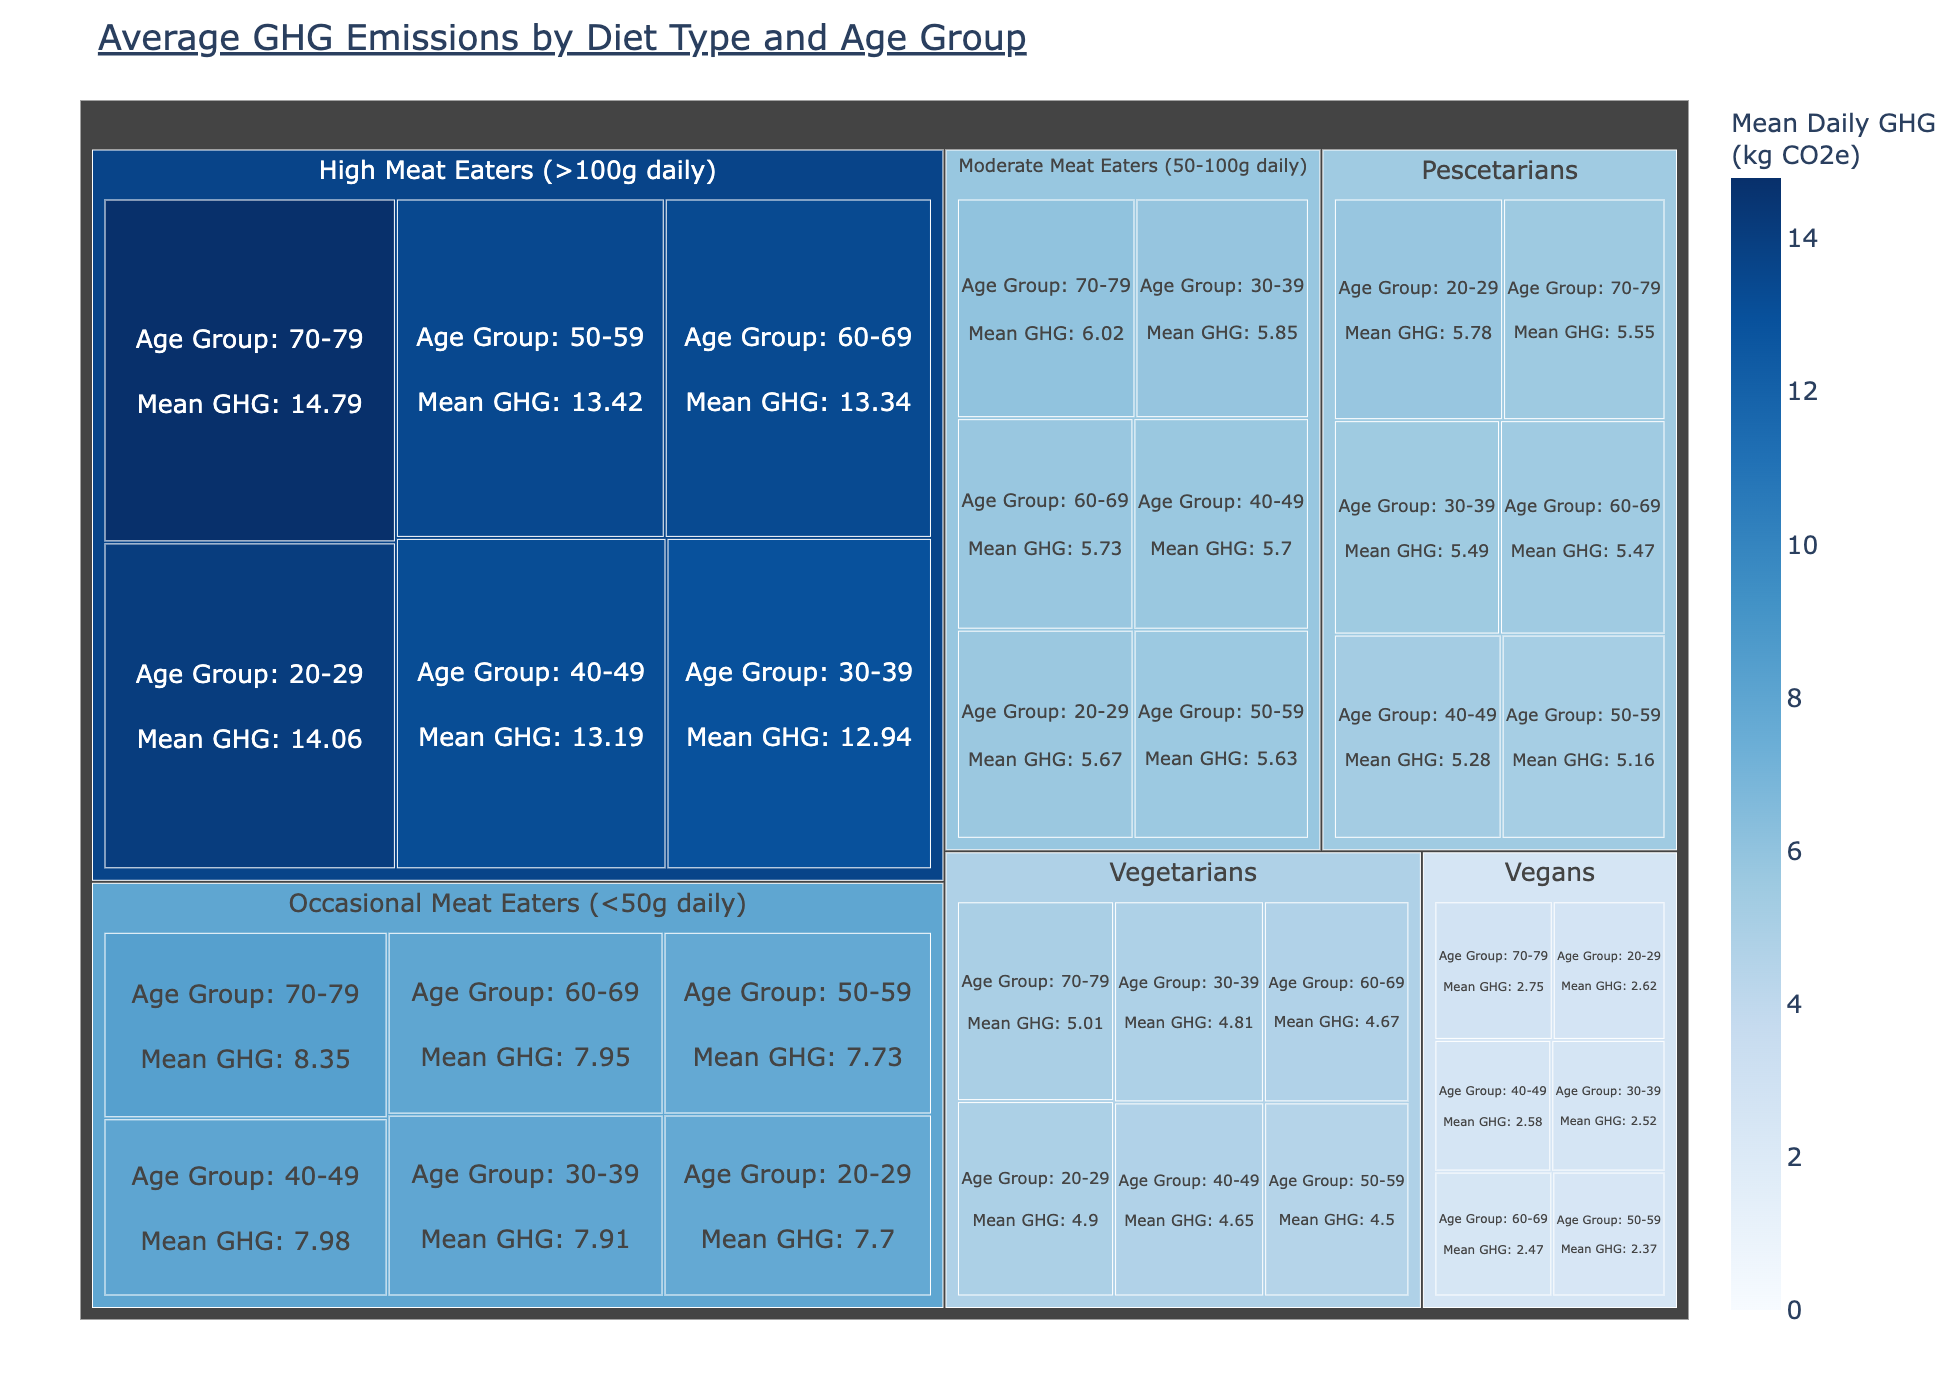

In [31]:
# treemap
fig = px.treemap(group_stats, 
                 path=['diet_group', 'age_group'], 
                 values='mean',
                 color='mean', 
                 color_continuous_scale='Blues',
                 title='<span style="text-decoration: underline;">Average GHG Emissions by Diet Type and Age Group</span>',
                 range_color=[0, group_stats['mean'].max()],
                 
                 custom_data=['min', 'max', 'median', 'std', 'IQR']
                )

fig.update_layout(width=3000, 
                  height=1400, 
                  title_font_size=35
                 )

# hover over and text and values
fig.update_traces(texttemplate="<br>Age Group: %{label}<br><br>Mean GHG: %{value}",
                  textposition='middle center', 
                  textfont_size=25,
                  hovertemplate="<b>%{parent}</b>\
                  <br>Age Group: %{label}\
                  <br>Mean GHG: %{value}\
                  <br>Min: %{customdata[0]}\
                  <br>Max: %{customdata[1]}\
                  <br>Median: %{customdata[2]}\
                  <br>Std Dev: %{customdata[3]}\
                  <br>IQR: %{customdata[4]}"
                 )

# formating colour bar (into 2 lines)
fig.update_layout(coloraxis_colorbar=dict(
    title='Mean Daily GHG<br>(kg CO2e)',
    title_font=dict(size=25),
    thickness=50, 
    
    tickfont=dict(size=25))
                 )

fig.show()


In [34]:
# To get treemap into a local host server
!pip install -U kaleido

     |████████████████████████████████| 85.2 MB 107 kB/s eta 0:00:01    |█▋                              | 4.2 MB 2.9 MB/s eta 0:00:29     |█████████████████████           | 55.6 MB 2.8 MB/s eta 0:00:11     |█████████████████████▋          | 57.5 MB 330 kB/s eta 0:01:24     |███████████████████████▉        | 63.3 MB 1.0 MB/s eta 0:00:22     |████████████████████████        | 64.0 MB 1.0 MB/s eta 0:00:21     |██████████████████████████▏     | 69.6 MB 868 kB/s eta 0:00:18     |███████████████████████████▍    | 72.9 MB 2.8 MB/s eta 0:00:05     |███████████████████████████████▌| 83.7 MB 2.3 MB/s eta 0:00:01


In [36]:
fig.write_html("treemap.html", full_html=True)

In [ ]:
#  in terminal if want to set up...
#  python -m http.server

In [32]:
import http.server
import socketserver
import webbrowser
    
PORT = 8099
Handler = http.server.SimpleHTTPRequestHandler

with socketserver.TCPServer(("", PORT), Handler) as httpd:
    print("serving at port", PORT)
    import webbrowser
    webbrowser.open(f"http://localhost:{PORT}/treemap_chart.html")
    httpd.serve_forever()
